#CMPE-257 Clustering Assignment: Applying KMeans Clustering (using scikit learn & pytorch) and DBScan Clustering (using scikit learn) on preprocessed data

### **Importing libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

### **Reading the Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Dataset/vehicalesDataCleaned.csv')
dataset.head(10)

,Unnamed: 0,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state,lat,long
0,31,16,15000,2013.0,13,7074,0,6.0,2,128000.0,0,0,2,10,0,1,32.5920,-85.518900
1,32,16,27990,2012.0,14,14119,2,8.0,2,68696.0,0,2,0,8,0,1,32.5900,-85.480000
2,33,16,34590,2016.0,7,14355,2,6.0,2,29499.0,0,2,0,8,9,1,32.5900,-85.480000
3,34,16,35000,2019.0,38,15423,0,6.0,2,43000.0,0,0,0,10,5,1,32.6013,-85.443974
4,35,16,29990,2016.0,7,4510,2,6.0,2,17302.0,0,2,0,8,8,1,32.5900,-85.480000
5,36,16,38590,2011.0,7,4833,2,8.0,2,30237.0,0,2,2,7,8,1,32.5900,-85.480000
6,38,16,32990,2017.0,20,17073,2,6.0,2,30041.0,0,2,0,7,9,1,32.5900,-85.480000
7,39,16,24590,2017.0,7,14417,2,6.0,2,40784.0,0,2,0,8,10,1,32.5900,-85.480000
8,40,16,30990,2016.0,7,4506,2,6.0,4,34940.0,0,2,0,8,1,1,32.5900,-85.480000
9,41,16,27990,2014.0,38,15471,2,6.0,4,17805.0,0,2,0,8,8,1,32.5900,-85.480000


In [ ]:
dataset = dataset.drop(['Unnamed: 0'], axis=1)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273533 entries, 0 to 273532
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        273533 non-null  int64  
 1   price         273533 non-null  int64  
 2   year          273533 non-null  float64
 3   manufacturer  273533 non-null  int64  
 4   model         273533 non-null  int64  
 5   condition     273533 non-null  int64  
 6   cylinders     273533 non-null  float64
 7   fuel          273533 non-null  int64  
 8   odometer      273533 non-null  float64
 9   title_status  273533 non-null  int64  
 10  transmission  273533 non-null  int64  
 11  drive         273533 non-null  int64  
 12  type          273533 non-null  int64  
 13  paint_color   273533 non-null  int64  
 14  state         273533 non-null  int64  
 15  lat           273533 non-null  float64
 16  long          273533 non-null  float64
dtypes: float64(5), int64(12)
memory usage: 35.5 MB


In [ ]:
scaler =  StandardScaler()
scaler.fit(dataset)
X_scaled = scaler.transform(dataset)

In [ ]:
pca = PCA(n_components = 2)
data_embeddings = pca.fit_transform(X_scaled)

## K-Means using Scikit-Learn

In [ ]:
from sklearn.cluster import KMeans

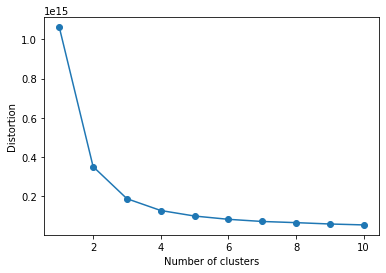

In [ ]:
distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(dataset)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [ ]:
clusters = KMeans(
        n_clusters=3, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )

In [ ]:
y_output = clusters.fit_predict(dataset)
y_output

array([0, 0, 2, ..., 2, 2, 2], dtype=int32)

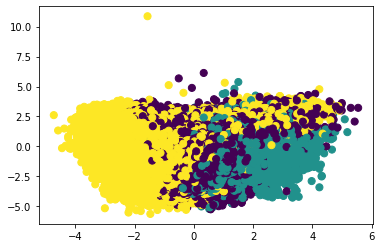

In [ ]:
plt.scatter(data_embeddings[:, 0], data_embeddings[:, 1], c=y_output, s=50, cmap='viridis')

## K-Means using Pytorch

In [ ]:
pip install kmeans-pytorch

In [ ]:
import torch
from kmeans_pytorch import kmeans

In [ ]:
# data
data_size, dims, num_clusters = 1000, 2, 3

x = torch.from_numpy(dataset.to_numpy())

In [ ]:
# kmeans
cluster_ids_x, cluster_centers = kmeans(
    X=x, num_clusters=3, distance='euclidean', device=torch.device('cuda:0')
)

running k-means on cuda:0..


[running kmeans]: 23it [00:10,  2.29it/s, center_shift=0.000000, iteration=23, tol=0.000100]


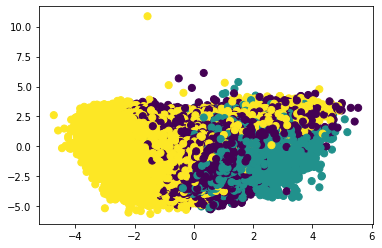

In [ ]:
plt.scatter(data_embeddings[:, 0], data_embeddings[:, 1], c=cluster_ids_x, s=50, cmap='viridis')

KMeans is not feasible for this dataset as most of the datapoints are overlapped and it's difficult to differentiate. 



## DBSCAN Scikit-Learn

In [ ]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.4, min_samples=20)
cluster_id= db.fit_predict(dataset)

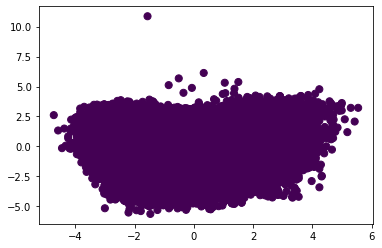

In [ ]:
plt.scatter(data_embeddings[:, 0], data_embeddings[:, 1], c=cluster_id, s=50, cmap='viridis')

DBScan Clustering is not appropriate for this dataset, as all clusters are not clearly visible. As per the plot above, clusters are overlapped. 